# Kandukuri Joseph Kumar
## NapQueen's Assignment



### Importing the data

In [68]:
import pandas as pd
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
train_data.head()
train_data.info()
train_data.describe()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB


,0
ID,0
date,0
Item Id,2
Item Name,1832
ad_spend,24187
anarix_id,0
units,17898
unit_price,0


Preprocessing

In [69]:
import pandas as pd

train_data['date'] = pd.to_datetime(train_data['date'])
train_data.set_index('date', inplace=True)
train_data.interpolate(method='linear', limit_direction='both', inplace=True)

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101490 entries, 2022-04-12 to 2024-05-31
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   Item Id     101488 non-null  object 
 2   Item Name   99658 non-null   object 
 3   ad_spend    101490 non-null  float64
 4   anarix_id   101490 non-null  object 
 5   units       101490 non-null  float64
 6   unit_price  101490 non-null  float64
dtypes: float64(3), object(4)
memory usage: 6.2+ MB


<ipython-input-69-3c300824b85b>:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train_data.interpolate(method='linear', limit_direction='both', inplace=True)


,ID,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
date,,,,,,,
2022-04-12,2022-04-12_B09KDTS4DC,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",0.0,NAPQUEEN,0.0,0.0
2022-04-12,2022-04-12_B09MR2MLZH,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,0.0,NAPQUEEN,0.0,0.0
2022-04-12,2022-04-12_B09KSYL73R,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",0.0,NAPQUEEN,0.0,0.0
2022-04-12,2022-04-12_B09KT5HMNY,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",0.0,NAPQUEEN,0.0,0.0
2022-04-12,2022-04-12_B09KTF8ZDQ,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",0.0,NAPQUEEN,0.0,0.0


In [70]:
train_data.isnull().sum()

,0
ID,0
Item Id,2
Item Name,1832
ad_spend,0
anarix_id,0
units,0
unit_price,0


Since the Null values in Item Id and name are less than 1% of the data, we dropped the corrosponding rows for further processing

In [71]:
train_data.dropna(subset=['Item Id', 'Item Name'], inplace=True)
print(train_data.info())
print(train_data.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99658 entries, 2022-04-12 to 2024-05-31
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          99658 non-null  object 
 1   Item Id     99658 non-null  object 
 2   Item Name   99658 non-null  object 
 3   ad_spend    99658 non-null  float64
 4   anarix_id   99658 non-null  object 
 5   units       99658 non-null  float64
 6   unit_price  99658 non-null  float64
dtypes: float64(3), object(4)
memory usage: 6.1+ MB
None
                               ID     Item Id  \
date                                            
2022-04-12  2022-04-12_B09KDTS4DC  B09KDTS4DC   
2022-04-12  2022-04-12_B09MR2MLZH  B09MR2MLZH   
2022-04-12  2022-04-12_B09KSYL73R  B09KSYL73R   
2022-04-12  2022-04-12_B09KT5HMNY  B09KT5HMNY   
2022-04-12  2022-04-12_B09KTF8ZDQ  B09KTF8ZDQ   

                                                    Item Name  ad_spend  \
date                          

In [72]:
train_data.isnull().sum()

,0
ID,0
Item Id,0
Item Name,0
ad_spend,0
anarix_id,0
units,0
unit_price,0


Visualising the cleaned Data

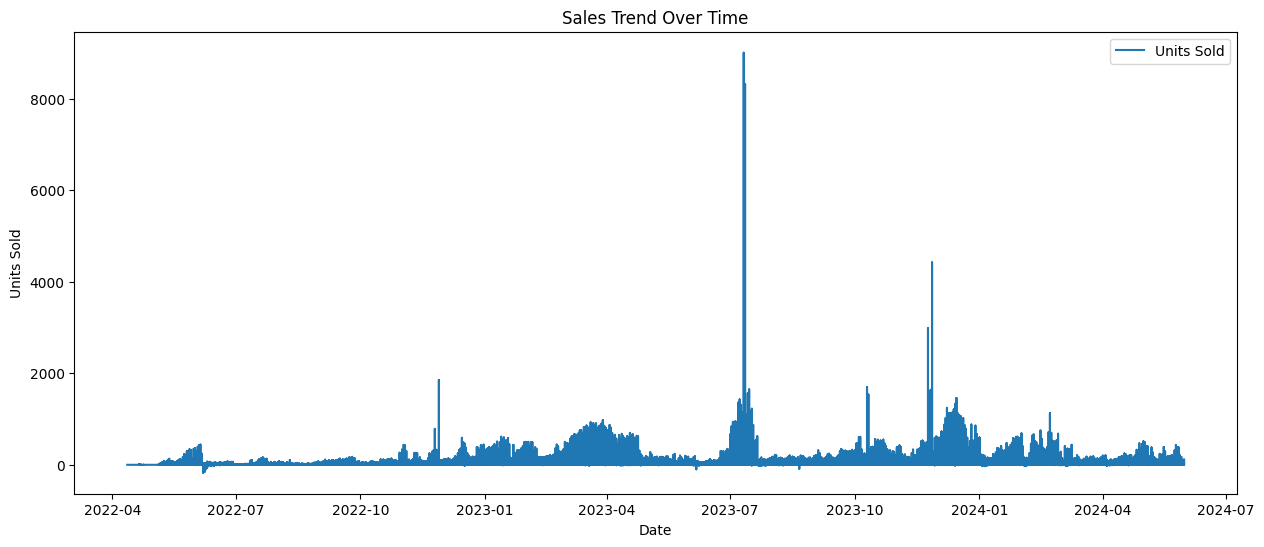

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['units'], label='Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()


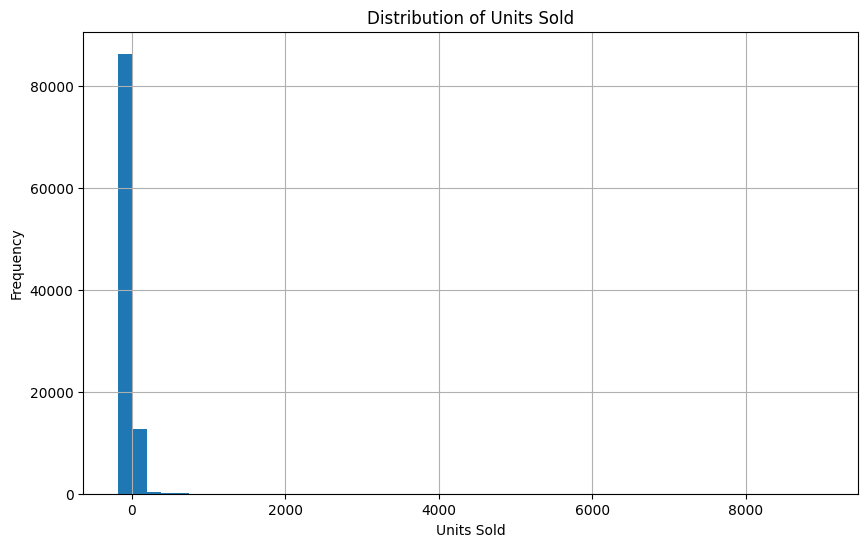

In [74]:
plt.figure(figsize=(10, 6))
train_data['units'].hist(bins=50)
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Units Sold')
plt.show()


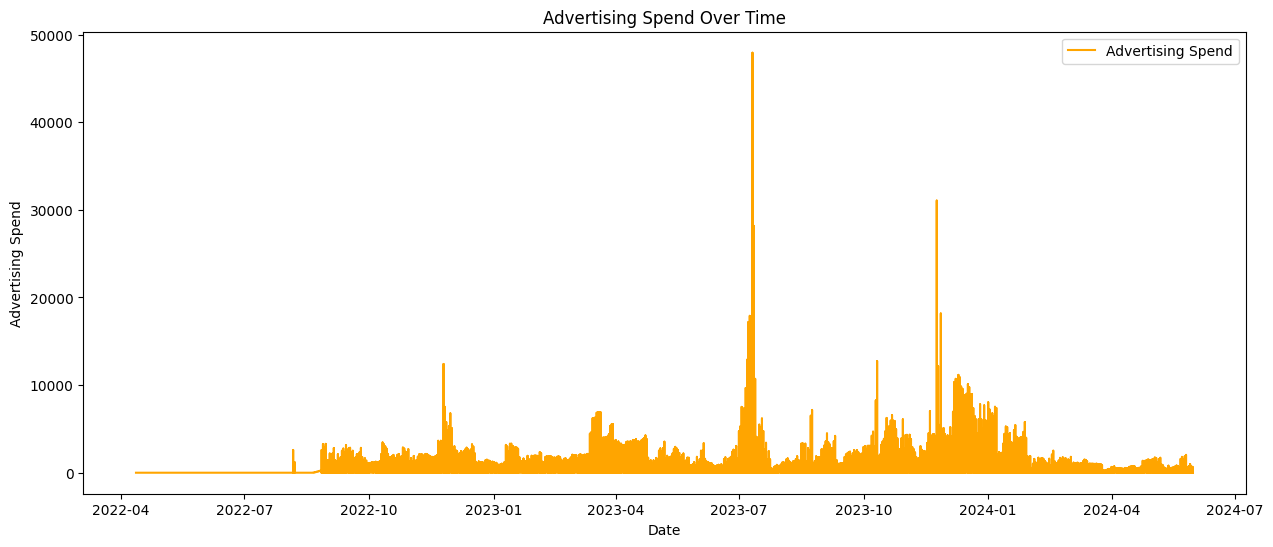

In [75]:
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['ad_spend'], label='Advertising Spend', color='orange')
plt.xlabel('Date')
plt.ylabel('Advertising Spend')
plt.title('Advertising Spend Over Time')
plt.legend()
plt.show()


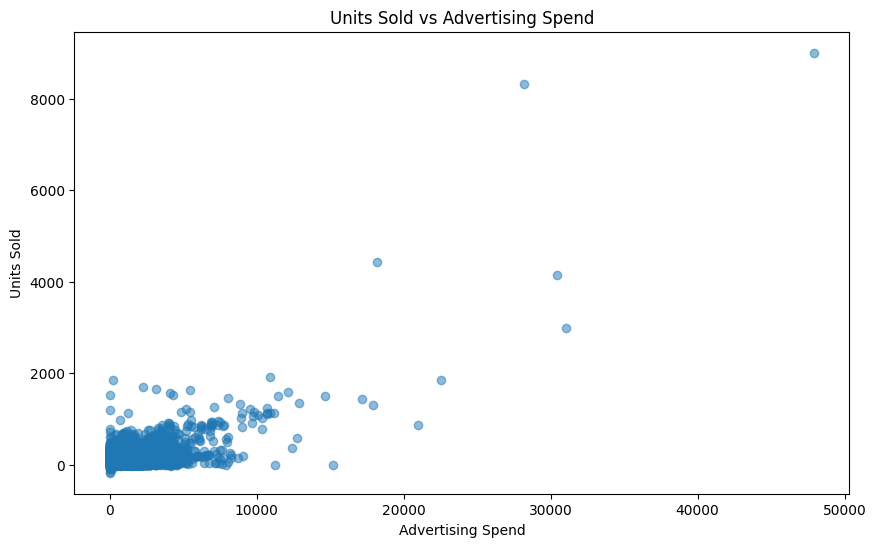

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['ad_spend'], train_data['units'], alpha=0.5)
plt.xlabel('Advertising Spend')
plt.ylabel('Units Sold')
plt.title('Units Sold vs Advertising Spend')
plt.show()


In [77]:
correlation = train_data['ad_spend'].corr(train_data['units'])
print(f'Correlation: {correlation}')


Correlation: 0.7150979326355272


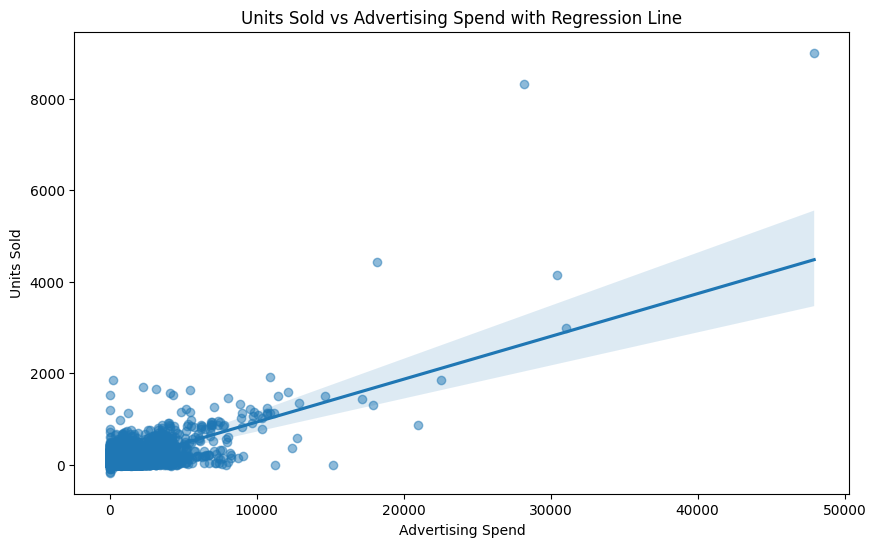

In [78]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x='ad_spend', y='units', data=train_data, scatter_kws={'alpha':0.5})
plt.xlabel('Advertising Spend')
plt.ylabel('Units Sold')
plt.title('Units Sold vs Advertising Spend with Regression Line')
plt.show()


In [79]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
features = ['units', 'ad_spend']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_data[features])
scaled_data = pd.DataFrame(scaled_data, index=train_data.index, columns=features)
scaled_data.head()


,units,ad_spend
date,,
2022-04-12,0.018851,0.0
2022-04-12,0.018851,0.0
2022-04-12,0.018851,0.0
2022-04-12,0.018851,0.0
2022-04-12,0.018851,0.0


In [80]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length][0]  # Predicting 'units'
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)
SEQ_LENGTH = 30
sequences, labels = create_sequences(scaled_data.values, SEQ_LENGTH)
split = int(0.8 * len(sequences))
train_sequences = sequences[:split]
train_labels = labels[:split]
val_sequences = sequences[split:]
val_labels = labels[split:]

train_sequences.shape, train_labels.shape, val_sequences.shape, val_labels.shape


((79702, 30, 2), (79702,), (19926, 30, 2), (19926,))

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_sequences, train_labels, epochs=5, batch_size=32, validation_data=(val_sequences, val_labels))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2491/2491 ━━━━━━━━━━━━━━━━━━━━ 91s 35ms/step - loss: 7.0100e-05 - val_loss: 1.5201e-05
Epoch 2/5
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - loss: 5.5484e-05 - val_loss: 1.5134e-05
Epoch 3/5
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - loss: 3.6199e-05 - val_loss: 1.5149e-05
Epoch 4/5
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 138s 32ms/step - loss: 9.0451e-05 - val_loss: 1.5570e-05
Epoch 5/5
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - loss: 4.7277e-05 - val_loss: 1.5007e-05


623/623 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
Mean Squared Error (MSE) on validation set: 1263.823382827674


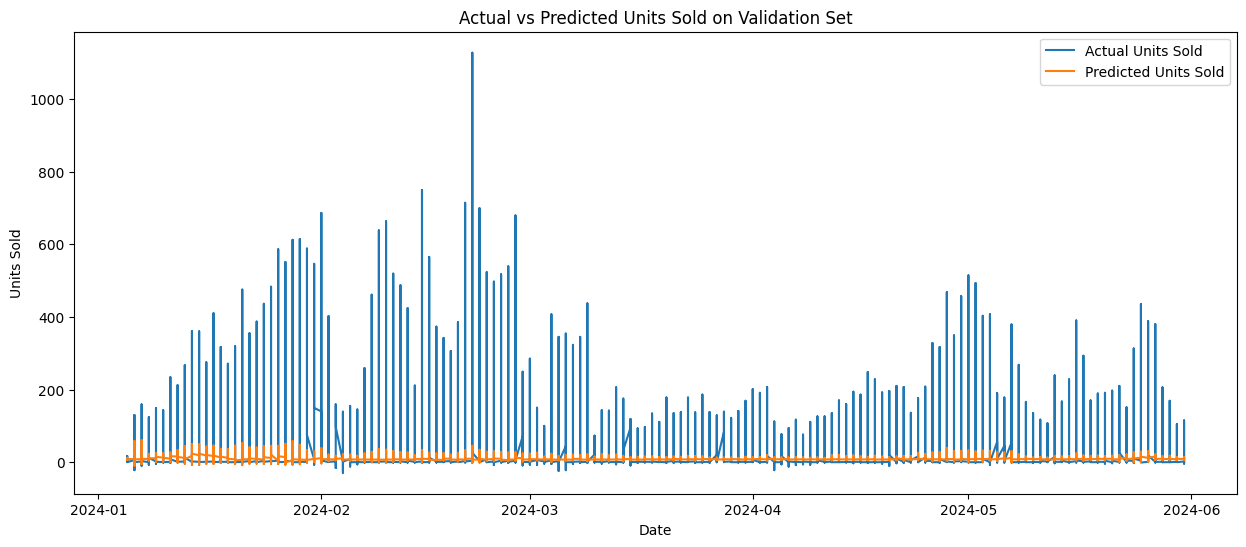

In [82]:
from sklearn.metrics import mean_squared_error
val_predictions = model.predict(val_sequences)
val_predictions = scaler.inverse_transform(np.concatenate((val_predictions, np.zeros((val_predictions.shape[0], 1))), axis=1))[:,0]
val_labels = scaler.inverse_transform(np.concatenate((val_labels.reshape(-1, 1), np.zeros((val_labels.shape[0], 1))), axis=1))[:,0]
mse = mean_squared_error(val_labels, val_predictions)
print(f'Mean Squared Error (MSE) on validation set: {mse}')
plt.figure(figsize=(15, 6))
plt.plot(train_data.index[SEQ_LENGTH:][split:], val_labels, label='Actual Units Sold')
plt.plot(train_data.index[SEQ_LENGTH:][split:], val_predictions, label='Predicted Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Actual vs Predicted Units Sold on Validation Set')
plt.legend()
plt.show()


# Evaluation using Specific Item ID

In [83]:
item_id = 'B09KDTS4DC'  # Replace with the desired Item ID
item_data = train_data[train_data['Item Id'] == item_id]
if len(item_data) > SEQ_LENGTH:
    print(f'Number of records for Item ID {item_id}: {len(item_data)}')
else:
    print('Not enough data')


Number of records for Item ID B09KDTS4DC: 780


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0046 - val_loss: 3.9741e-04
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0072 - val_loss: 1.7429e-04
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0035 - val_loss: 1.6623e-04
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0043 - val_loss: 1.8172e-04
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0034 - val_loss: 1.0096e-04
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0059 - val_loss: 4.1750e-05
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0031 - val_loss: 1.5354e-04
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0025 - val_loss: 3.2192e-04
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0029 - val_loss: 2.7352e-04
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0026 - val_loss: 2.6083e-04
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0035 - val_loss: 5.4291e-04
Epoch 12/20
19/19 ━━━━━━━━━━━━

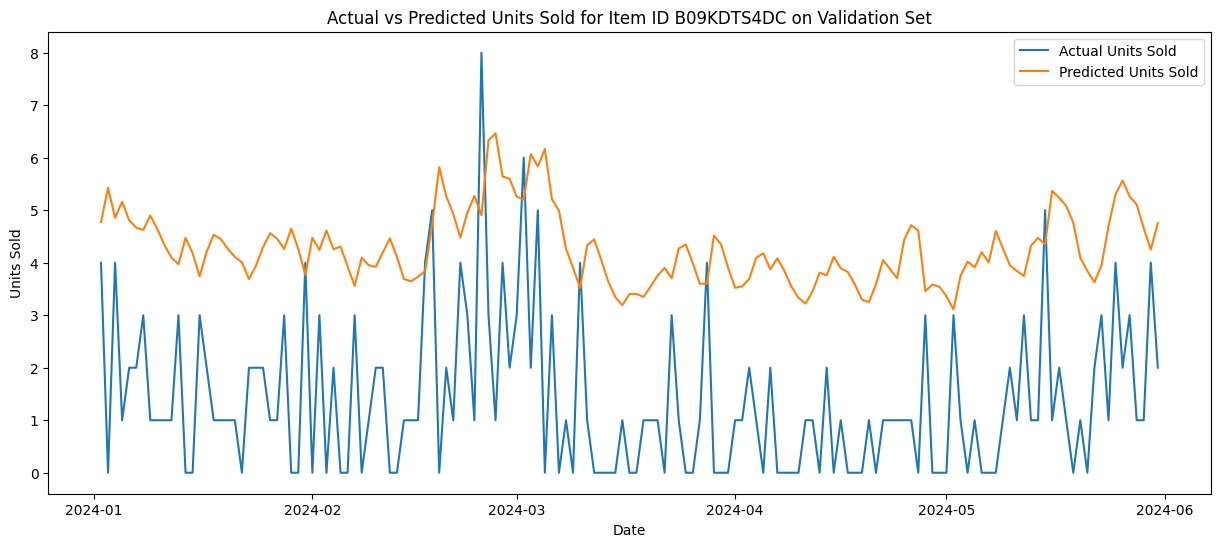

In [84]:
item_scaled_data = scaler.fit_transform(item_data[features])
item_scaled_data = pd.DataFrame(item_scaled_data, index=item_data.index, columns=features)
item_sequences, item_labels = create_sequences(item_scaled_data.values, SEQ_LENGTH)
split = int(0.8 * len(item_sequences))
item_train_sequences = item_sequences[:split]
item_train_labels = item_labels[:split]
item_val_sequences = item_sequences[split:]
item_val_labels = item_labels[split:]
item_model = Sequential()
item_model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, len(features))))
item_model.add(Dropout(0.2))
item_model.add(LSTM(50, return_sequences=False))
item_model.add(Dropout(0.2))
item_model.add(Dense(1))
item_model.compile(optimizer='adam', loss='mean_squared_error')
item_model.fit(item_train_sequences, item_train_labels, epochs=20, batch_size=32, validation_data=(item_val_sequences, item_val_labels))
item_val_predictions = item_model.predict(item_val_sequences)
item_val_predictions = scaler.inverse_transform(np.concatenate((item_val_predictions, np.zeros((item_val_predictions.shape[0], 1))), axis=1))[:,0]
item_val_labels = scaler.inverse_transform(np.concatenate((item_val_labels.reshape(-1, 1), np.zeros((item_val_labels.shape[0], 1))), axis=1))[:,0]
item_mse = mean_squared_error(item_val_labels, item_val_predictions)
print(f'Mean Squared Error (MSE) on validation set for Item ID {item_id}: {item_mse}')
plt.figure(figsize=(15, 6))
plt.plot(item_data.index[SEQ_LENGTH:][split:], item_val_labels, label='Actual Units Sold')
plt.plot(item_data.index[SEQ_LENGTH:][split:], item_val_predictions, label='Predicted Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title(f'Actual vs Predicted Units Sold for Item ID {item_id} on Validation Set')
plt.legend()
plt.show()


# Using the whole train data to predict test Data

<ipython-input-85-a1a3b024e13b>:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train_data.interpolate(method='linear', limit_direction='both', inplace=True)


Epoch 1/2
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - loss: 9.7083e-05 - val_loss: 1.5055e-05
Epoch 2/2
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 88s 33ms/step - loss: 3.8864e-05 - val_loss: 1.4973e-05


<ipython-input-85-a1a3b024e13b>:47: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  test_data.interpolate(method='linear', limit_direction='both', inplace=True)


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Test predictions saved to test_predictions.csv


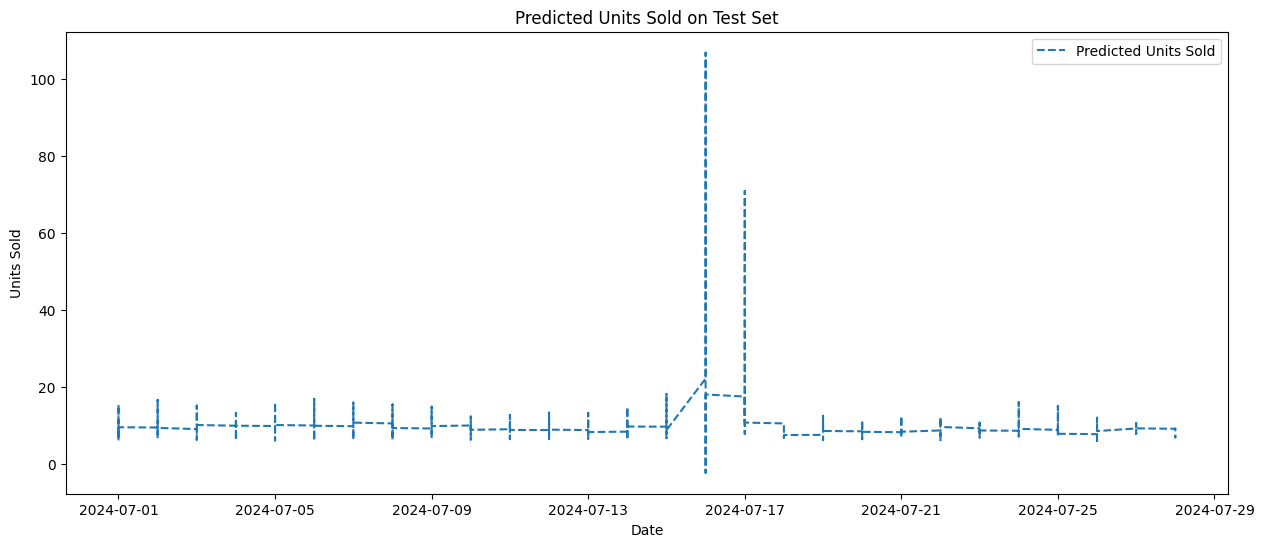

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data['date'] = pd.to_datetime(train_data['date'])
train_data.set_index('date', inplace=True)
train_data = train_data.infer_objects()  # Infer objects for interpolation
train_data.interpolate(method='linear', limit_direction='both', inplace=True)
train_data.dropna(subset=['Item Id', 'Item Name'], inplace=True)
features = ['units', 'ad_spend']
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[features])
scaled_train_data = pd.DataFrame(scaled_train_data, index=train_data.index, columns=features)
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length][0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)
SEQ_LENGTH = 30
train_sequences, train_labels = create_sequences(scaled_train_data.values, SEQ_LENGTH)
split = int(0.8 * len(train_sequences))
train_sequences, val_sequences = train_sequences[:split], train_sequences[split:]
train_labels, val_labels = train_labels[:split], train_labels[split:]
model = Sequential()
model.add(tf.keras.Input(shape=(SEQ_LENGTH, len(features))))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_sequences, train_labels, epochs=2, batch_size=32, validation_data=(val_sequences, val_labels))
test_data['date'] = pd.to_datetime(test_data['date'])
test_data.set_index('date', inplace=True)
test_data = test_data.infer_objects()
test_data.interpolate(method='linear', limit_direction='both', inplace=True)
test_data.dropna(subset=['Item Id', 'Item Name'], inplace=True)
test_scaled_data = test_data[['ad_spend']].copy()
test_scaled_data['units'] = 0
test_scaled_data = test_scaled_data[['units', 'ad_spend']]
scaled_test_data = scaler.transform(test_scaled_data)
def create_test_sequences(data, seq_length, initial_sequence):
    sequences = []
    current_sequence = initial_sequence
    for i in range(len(data)):
        next_sequence = np.append(current_sequence[1:], [data[i]], axis=0)
        sequences.append(next_sequence)
        current_sequence = next_sequence
    return np.array(sequences)
initial_sequence = scaled_train_data.values[-SEQ_LENGTH:]
test_sequences = create_test_sequences(scaled_test_data, SEQ_LENGTH, initial_sequence)
test_predictions = model.predict(test_sequences)
test_predictions = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], 1))), axis=1))[:, 0]
test_data['Predicted Units'] = test_predictions
test_data.to_csv('test_predictions.csv')

print(f'Test predictions saved to test_predictions.csv')
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data['Predicted Units'], label='Predicted Units Sold', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Predicted Units Sold on Test Set')
plt.legend()
plt.show()


# Arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Test predictions saved to test_predictions_combined.csv


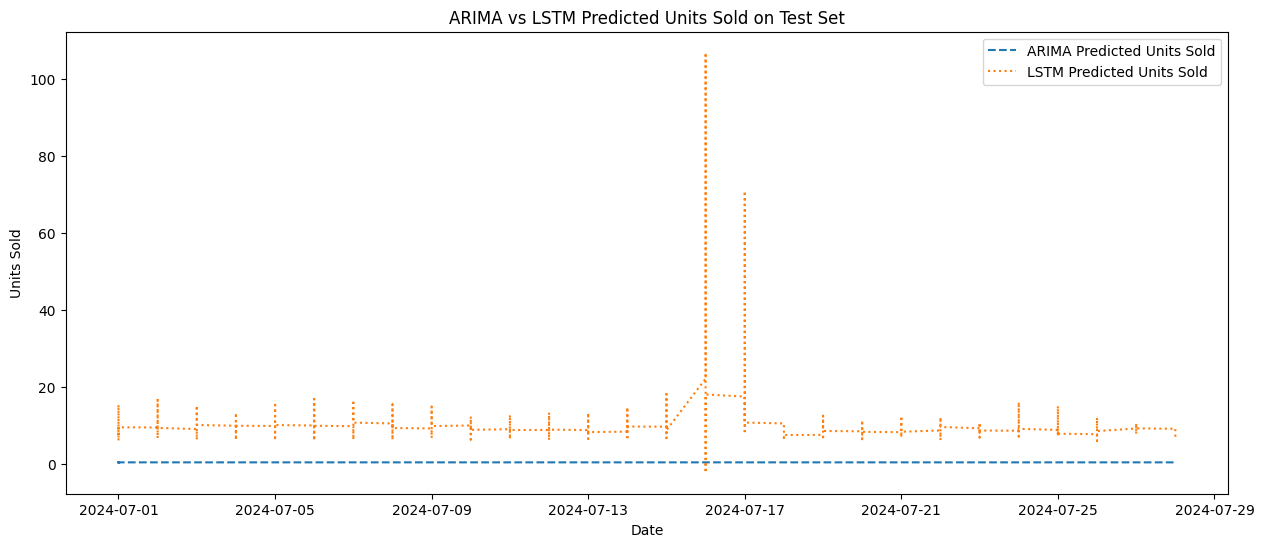

In [86]:
model = ARIMA(train_data['units'], order=(5, 1, 0))
model_fit = model.fit()
start = len(train_data)
end = start + len(test_data) - 1
arima_predictions = model_fit.predict(start=start, end=end, typ='levels')
test_data['ARIMA Predicted Units'] = arima_predictions.values
lstm_predictions = pd.read_csv('test_predictions.csv', index_col='date', parse_dates=True)
test_data['LSTM Predicted Units'] = lstm_predictions['Predicted Units'].values
test_data.to_csv('test_predictions_combined.csv')

print(f'Test predictions saved to test_predictions_combined.csv')
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data['ARIMA Predicted Units'], label='ARIMA Predicted Units Sold', linestyle='dashed')
plt.plot(test_data.index, test_data['LSTM Predicted Units'], label='LSTM Predicted Units Sold', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('ARIMA vs LSTM Predicted Units Sold on Test Set')
plt.legend()
plt.show()

Since the LSTM suits better, and there is no enough time to check with other algorithms, I'm concluding it here with LSTM model.